In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models,layers

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=12
CHANNELS=3
EPOCHS=2

In [4]:
data_set=tf.keras.preprocessing.image_dataset_from_directory(
    'D:\data science projects\Black fungus project\Black Fungus data',
    shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 182 files belonging to 2 classes.


In [5]:
class_names=data_set.class_names
class_names

['Fungus', 'Normal']

In [6]:
len(data_set)

16

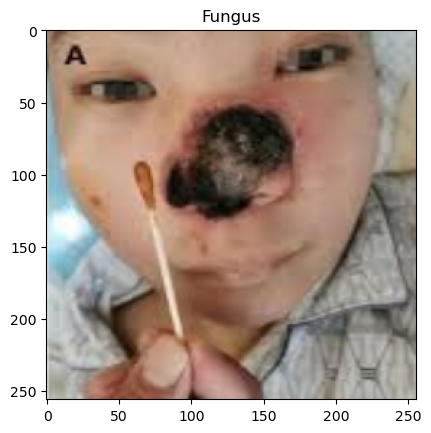

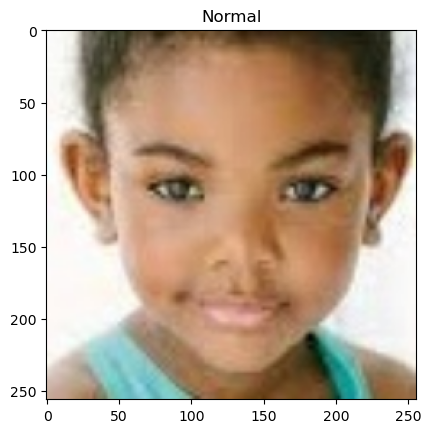

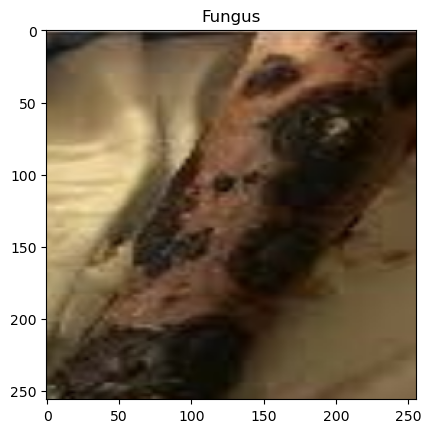

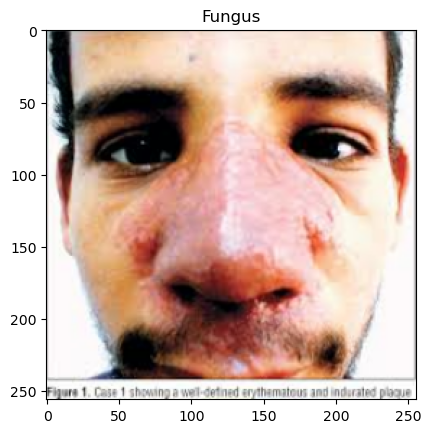

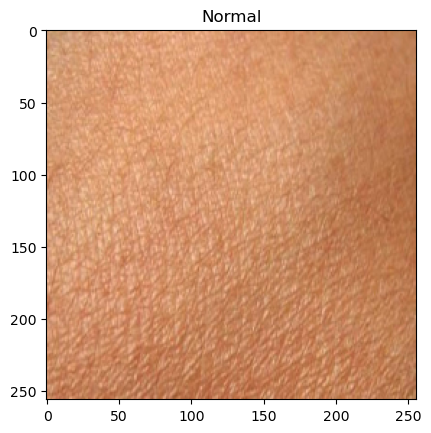

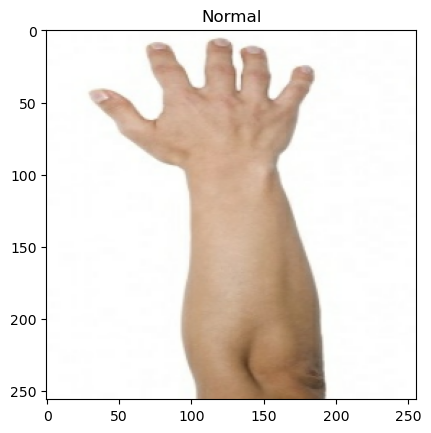

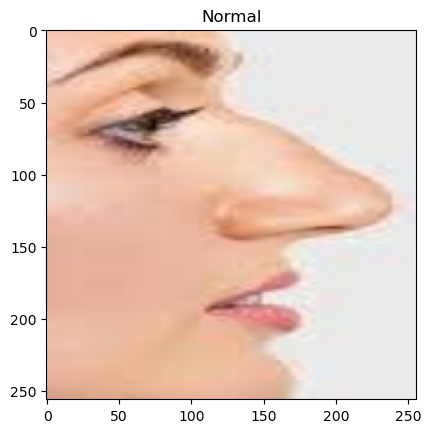

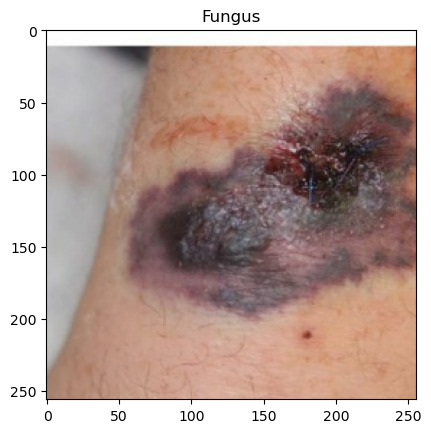

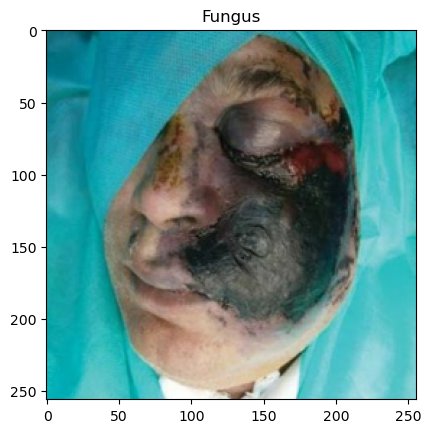

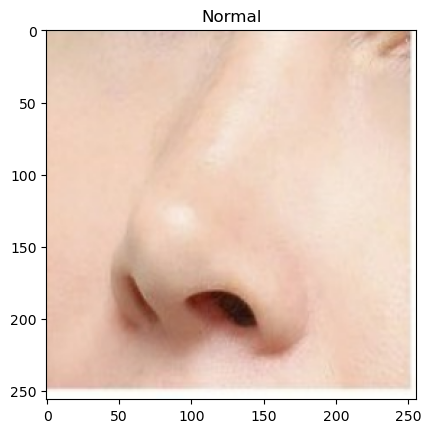

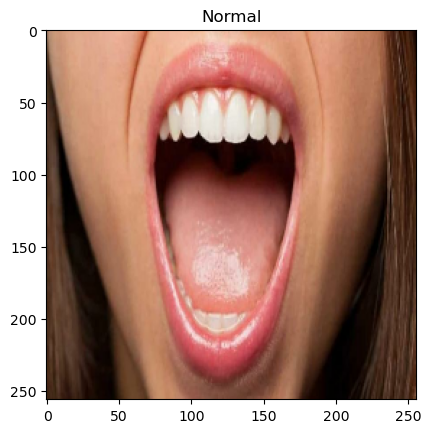

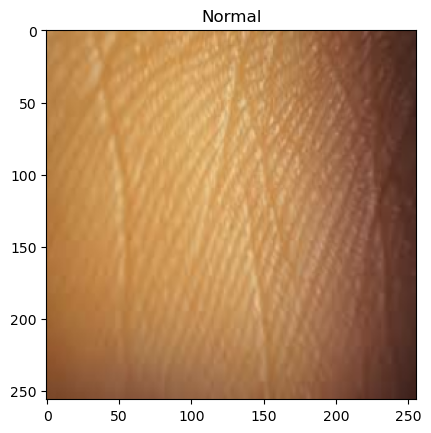

In [7]:
for image_batch, label_batch in data_set.take(1):
    for i in range(BATCH_SIZE):
        plt.subplot() 
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.show()
    

In [8]:
# 70 % train, 30% --> 10% test 20% val

train_size=0.7     

len(data_set)*train_size

11.2

In [9]:
train_ds=data_set.take(11)

In [10]:
test_ds=data_set.skip(11)    # not exactly test_ds
len(test_ds)

5

In [11]:
val_size=0.2
len(data_set)*val_size

3.2

In [12]:
val_ds = test_ds.take(3)

In [13]:
test_ds = test_ds.skip(3) 

len(test_ds)

2

In [14]:
# cache() will read the image from desk & next iteration when u we need this image it will keep that in memory, improve perfomence
# prepatch() if we are using gpu & cpu if gpu is busy to training prepatch will load next set of batch from desk

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
# IF A IMAGE IS SOME DIFFERENT DIMENSION THIS LAYER TAKE CARE OF RESIZING IT (INT0 256,256)


resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [16]:
# augmentation helps to create some new samples like horizontal,contrast, rotation,zoom.(to make the model robust)

data_augmentatioin=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2


model=models.Sequential([  
    resize_and_rescale,
    data_augmentatioin,
    layers.Conv2D(filters=16,kernel_size=(2,2),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (12, 256, 256, 3)         0         
_________________________________________________________________
sequential_1 (Sequential)    (12, 256, 256, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (12, 255, 255, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (12, 127, 127, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (12, 126, 126, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (12, 63, 63, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (12, 62, 62, 32)         

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history=model.fit(
    train_ds,
    
    
     
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/2
11/11 [==============================] - 13s 848ms/step - loss: 0.7035 - accuracy: 0.5606 - val_loss: 0.6835 - val_accuracy: 0.5278
Epoch 2/2
11/11 [==============================] - 5s 495ms/step - loss: 0.6926 - accuracy: 0.5455 - val_loss: 0.6657 - val_accuracy: 0.6667


In [21]:
scores=model.evaluate(test_ds)

2/2 [==============================] - 1s 106ms/step - loss: 0.6979 - accuracy: 0.4286


In [22]:
scores

[0.6978928446769714, 0.4285714328289032]

In [23]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

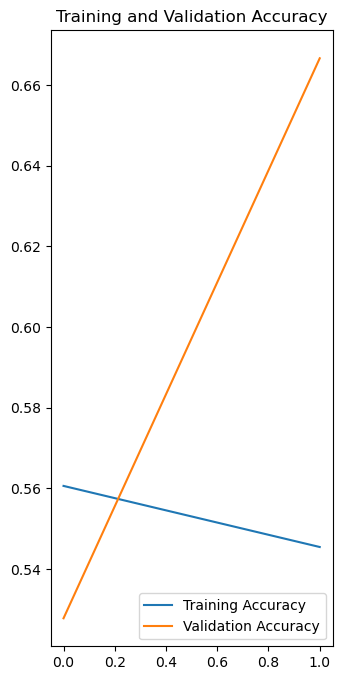

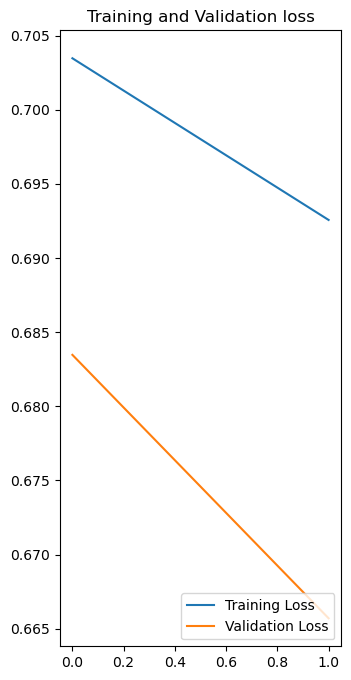

In [24]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

plt.show()

first image to prdict
actual label :  Fungus
Consider rewriting this model with the Functional API.
predicted label :  Normal


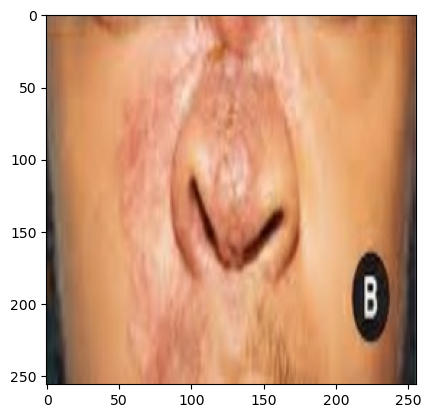

In [25]:
for images_batch,labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('first image to prdict')
    plt.imshow(first_image)
    print('actual label : ',class_names[first_label])
    
    batch_prediction = model.predict([images_batch])
    print('predicted label : ',class_names[np.argmax(batch_prediction[0])])
    plt.show()

In [26]:
def predict(model,img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class, confidence

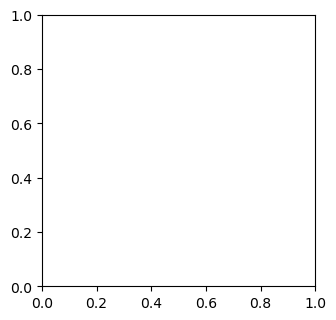

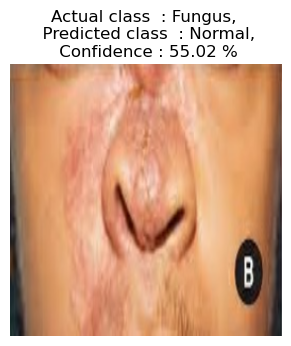

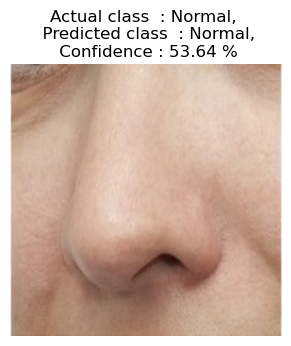

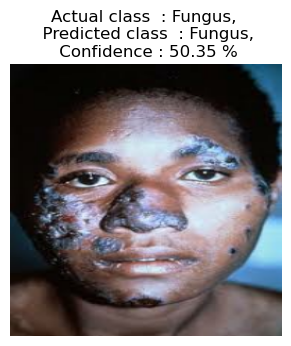

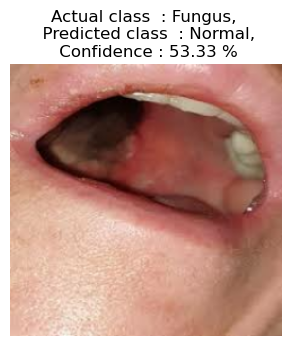

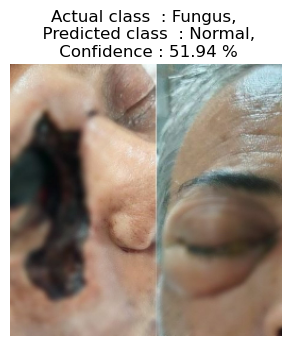

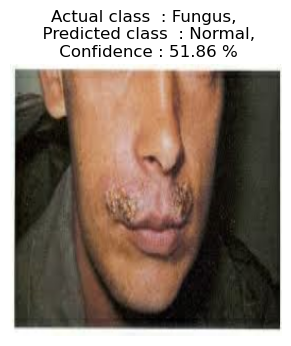

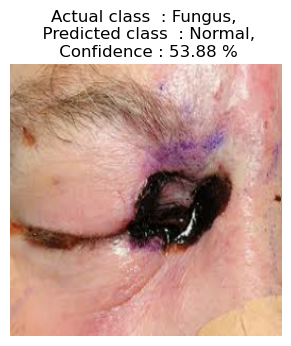

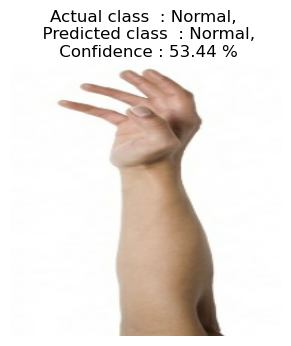

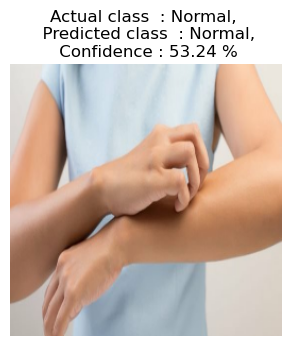

In [28]:
for images,labels in test_ds.take(1):
    for i in range(9):
        plt.figure(figsize=(12,12))
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
    
        
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual class  : {actual_class}, \n  Predicted class  : {predicted_class}, \n Confidence : {confidence} %")
        plt.axis('off')
        plt.show()


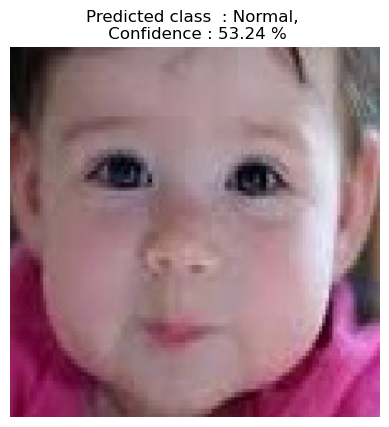

In [83]:
img_path='D:\data science projects\Black fungus project\Images\C_Normal.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

predicted_class,confidence = predict(model,img_preprocessed)

plt.imshow(img)
plt.title(f"Predicted class  : {predicted_class}, \n Confidence : {confidence} %")
plt.axis('off')
plt.show()

In [82]:
model_version=1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets
